# **TP2 - Audio**

---

Manel Lounissi - Sandeep Nirmal



Installer les dépendances

In [1]:
!pip install kagglehub
!pip install librosa
!pip install matplotlib

**1. Charger un fichier audio .wav ou .ogg avec librosa.**

In [2]:

import kagglehub
import os, glob
import librosa

# Télécharger le dataset audio depuis Kaggle
path = kagglehub.dataset_download("ouaraskhelilrafik/tp-02-audio")
print("Dataset téléchargé dans :", path)

# Chercher un fichier audio wav ou ogg
audio_files = glob.glob(os.path.join(path, "**", "*.wav"), recursive=True) \
             + glob.glob(os.path.join(path, "**", "*.ogg"), recursive=True)

print("Nombre de fichiers audio trouvés :", len(audio_files))
print("Exemple :", audio_files[0])

# Charger le premier audio
y, sr = librosa.load(audio_files[0], sr=None)  # sr=None pour garder la fréquence d'origine


Using Colab cache for faster access to the 'tp-02-audio' dataset.
Dataset téléchargé dans : /kaggle/input/tp-02-audio
Nombre de fichiers audio trouvés : 600
Exemple : /kaggle/input/tp-02-audio/Data/Data/102 - Rooster/5-194930-A.ogg


**2. Afficher la taille du signal et sa durée.**

In [3]:
print("Taille du signal :", len(y))
print("Durée (secondes) :", len(y) / sr)
print("Fréquence d’échantillonnage :", sr)


Taille du signal : 220544
Durée (secondes) : 5.0009977324263035
Fréquence d’échantillonnage : 44100


**3. Tracer le waveform.**

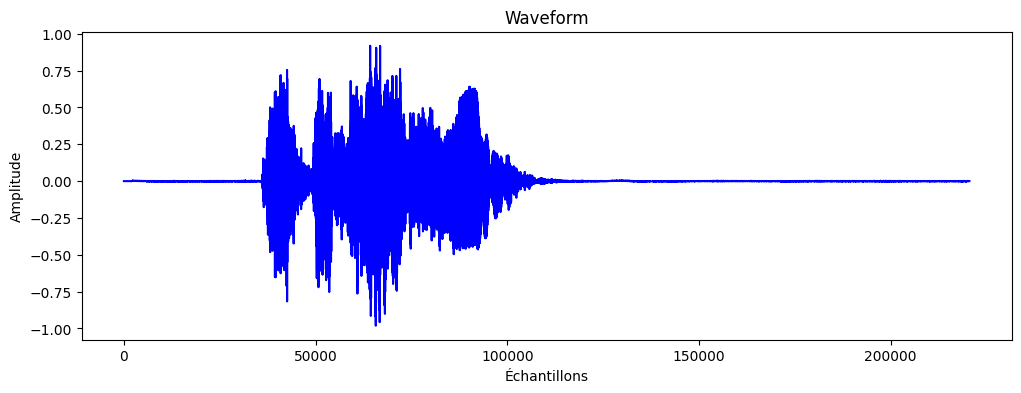

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(y, color="blue")
plt.title("Waveform")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.show()


**4. Calculer et afficher le spectrogramme.**

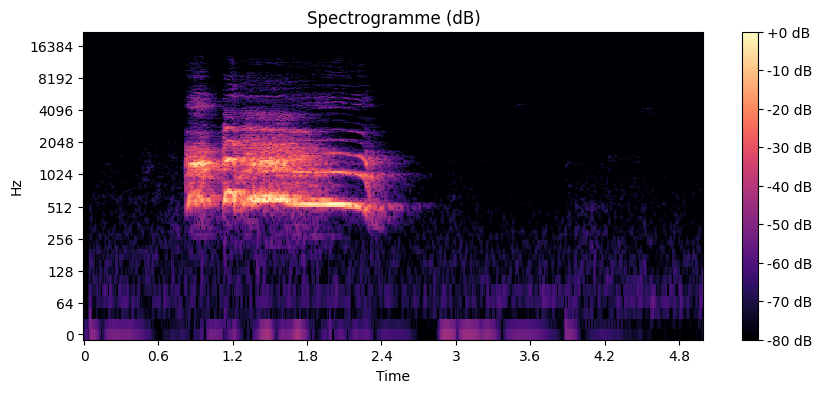

In [5]:
import librosa.display
import numpy as np

D = np.abs(librosa.stft(y))**2  # spectrogramme en puissance
S = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogramme (dB)")
plt.show()


**5. Jouer le son dans Jupyter (IPython.display.Audio).**

In [6]:
from IPython.display import Audio

Audio(y, rate=sr)
